Demonstrate entanglement and refute the existence of hidden variables.

[Textbook link here](https://qiskit.org/textbook/ch-states/unique-properties-qubits.html)

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

# Hardy's Paradox
Hardy's paradox demonstrates that hidden variables cannot exist. This is done by creating a state in which the following two properties are true:
1. The state |0z,0z> is not possible
2. If measureing one qubit in the x direction the other qubit in the z direction, the only observable states are:
    |1x,0z>, |0x,0z>, |0x,1z> and
    |0z,1x>, |0z,0x>, |1z,0x>
    That is, if one qubit is measured in the 1x state, the other qubit must be in the 0z state.

If both of the above statements are true then observing both qubits in the 1x state should be impossible. To explain this, assume we measure the both qubits to be in the 1x state. Then, by requirement 2, we know that, in this particular case, that if we had measured both of the qubits in the z direction the state would have been measured to be in the |0z,0z> state. Yet, requirement 1 does not allow the |0z,0z> state to exist.

How does this refute the existence of hidden variables? If we were living in a deterministic world where every state is described by some information that may be hidden to us there must be some variables that describe the state in which we measure |1x,1x>. However, the fact that it is impossible to observe |0z,0z> from this Hardy state tell us that there is no set of hidden variables that would describe a state that can be measured as |1x,1x> but not as |0z,0z>, which in a deterministic world are the same state.

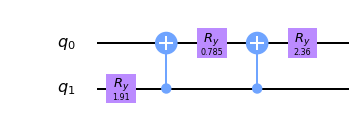

In [2]:
# Create hardy_state
hardy_state = QuantumCircuit(2)
hardy_state.ry(1.911,1)
hardy_state.cx(1,0)
hardy_state.ry(0.785,0)
hardy_state.cx(1,0)
hardy_state.ry(2.356,0)
hardy_state.draw(output='mpl')

## Demonstrating Hardy State
The following repeated measurements demonstrate that the Hardy state has been achieved. Namely, that requirements 1 and 2 are observed for the state created.

### Measure in Z Direction on Both Qubits
|0z,0z> is not observed

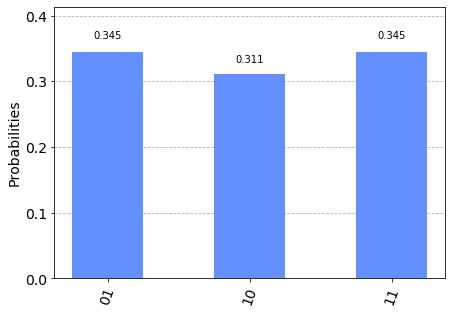

In [3]:
measure_zz = QuantumCircuit(2,2)
measure_zz.measure(0,0)
measure_zz.measure(1,1)

qc = hardy_state + measure_zz
qc.draw(output='mpl')

counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

### Qubit0 in X and Qubit1 in Z
Show that |1x,1z> is not observed

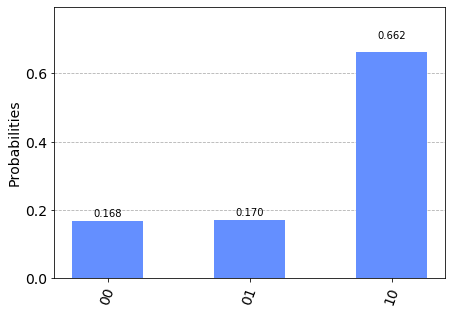

In [4]:
measure_xz = QuantumCircuit(2,2)
measure_xz.h(0)
measure_xz.measure(0,0)
measure_xz.measure(1,1)

qc = hardy_state + measure_xz

counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

### Qubit0 in Z and Qubit1 in X
Show that |1z,1x> is not observed

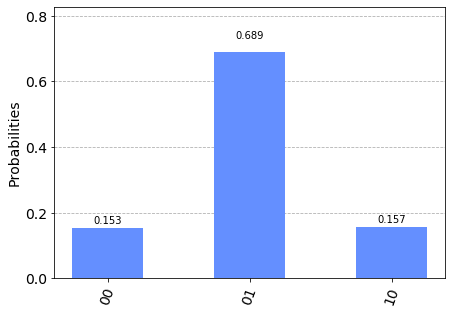

In [5]:
measure_zx = QuantumCircuit(2,2)
measure_zx.measure(0,0)
measure_zx.h(1)
measure_zx.measure(1,1)

qc = hardy_state + measure_zx

counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Demonstrate Paradoxical Measurements
This will show that observing the state |1x,1x> is possible

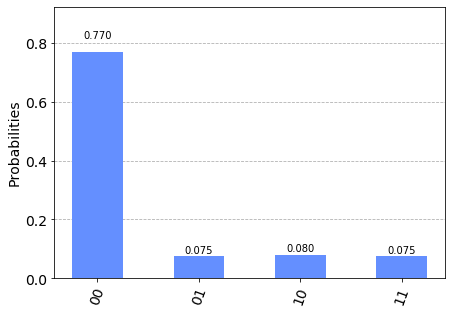

In [6]:
measure_xx = QuantumCircuit(2,2)
measure_xx.h(0)
measure_xx.measure(0,0)
measure_xx.h(1)
measure_xx.measure(1,1)

qc = hardy_state + measure_xx

counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)